In [1]:
!pip install ultralytics opencv-python tensorflow keras scikit-learn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.0/899.0 kB 20.9 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO
import os

# Check if GPU is available
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")


Using device: cuda


In [4]:
# Step 1: Load YOLOv8 Pretrained Model
model = YOLO("yolov8n.pt")  # Use 'yolov8s.pt', 'yolov8m.pt', etc., for larger models

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import zipfile
zip_path =  '/content/drive/MyDrive/Dataset_project.zip' # Replace with your ZIP file's path
extract_path = '/content/drive/My Drive/Folder/extracted'  # Replace with your desired extraction folder

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"ZIP file extracted to: {extract_path}")

ZIP file extracted to: /content/drive/My Drive/Folder/extracted


In [7]:
# Path to your data.yaml file (modify if needed)
data_yaml_path = '/content/drive/MyDrive/Folder/extracted/combine/data.yaml'

# Check if the file exists
if os.path.exists(data_yaml_path):
    print(f"Found dataset configuration: {data_yaml_path}")
else:
    raise FileNotFoundError("data.yaml file not found!")

Found dataset configuration: /content/drive/MyDrive/Folder/extracted/combine/data.yaml


In [8]:
# Load a pre-trained YOLOv8 model (e.g., yolov8n.pt, yolov8s.pt, etc.)
model = YOLO('yolov8n.pt')  # 'yolov8n.pt' is the nano model; you can choose 's', 'm', 'l', 'x' for different sizes

# Training parameters
results = model.train(
    data=data_yaml_path,    # Path to your dataset YAML file
    epochs=10,              # Number of epochs for training
    batch=32,               # Batch size
    imgsz=640,              # Input image size
    device=device,          # Use CUDA if available
    project='yolov8_results',  # Project folder for saving results
    name='custom_training',   # Experiment name
    pretrained=True         # Use pretrained weights
)

print("Training completed!")

Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Folder/extracted/combine/data.yaml, epochs=10, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=yolov8_results, name=custom_training, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=

100%|██████████| 755k/755k [00:00<00:00, 20.5MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 94.8MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Folder/extracted/combine/train/labels... 21673 images, 10 backgrounds, 0 corrupt: 100%|██████████| 21673/21673 [09:10<00:00, 39.34it/s]


train: New cache created: /content/drive/MyDrive/Folder/extracted/combine/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/Folder/extracted/combine/valid/labels... 2067 images, 7 backgrounds, 0 corrupt: 100%|██████████| 2067/2067 [00:45<00:00, 45.80it/s] 


val: New cache created: /content/drive/MyDrive/Folder/extracted/combine/valid/labels.cache
Plotting labels to yolov8_results/custom_training/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to yolov8_results/custom_training
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      4.49G     0.9889      1.532       1.19         11        640: 100%|██████████| 678/678 [09:03<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:33<00:00,  1.01s/it]


                   all       2067       3527      0.667      0.709      0.732      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      3.97G     0.8222     0.7946      1.087         15        640: 100%|██████████| 678/678 [08:54<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:31<00:00,  1.05it/s]


                   all       2067       3527      0.749      0.847      0.855      0.593

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      3.97G      0.754     0.6744      1.051         16        640: 100%|██████████| 678/678 [08:47<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:28<00:00,  1.16it/s]


                   all       2067       3527        0.8      0.823      0.886      0.633

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      3.97G     0.7109      0.616      1.026         15        640: 100%|██████████| 678/678 [08:43<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:29<00:00,  1.10it/s]


                   all       2067       3527      0.777      0.858      0.888      0.669

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      3.97G     0.6382     0.5425     0.9908         16        640: 100%|██████████| 678/678 [08:47<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:31<00:00,  1.03it/s]

                   all       2067       3527       0.87       0.85      0.921      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      3.97G     0.5872     0.4859     0.9671         13        640: 100%|██████████| 678/678 [08:51<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:30<00:00,  1.10it/s]

                   all       2067       3527      0.883      0.896      0.941      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      3.97G     0.5461     0.4403      0.945         15        640: 100%|██████████| 678/678 [08:49<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:32<00:00,  1.02it/s]


                   all       2067       3527      0.882      0.915      0.949      0.771

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      3.97G      0.508     0.4012     0.9294         14        640: 100%|██████████| 678/678 [08:53<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:31<00:00,  1.04it/s]

                   all       2067       3527      0.888       0.92      0.952      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      3.97G     0.4769     0.3654     0.9126         13        640: 100%|██████████| 678/678 [08:53<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:29<00:00,  1.13it/s]


                   all       2067       3527      0.908      0.925      0.957      0.802

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      3.97G      0.447     0.3315     0.9017         14        640: 100%|██████████| 678/678 [09:04<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:29<00:00,  1.11it/s]

                   all       2067       3527       0.92      0.917      0.961      0.809



10 epochs completed in 1.573 hours.
Optimizer stripped from yolov8_results/custom_training/weights/last.pt, 6.2MB
Optimizer stripped from yolov8_results/custom_training/weights/best.pt, 6.2MB

Validating yolov8_results/custom_training/weights/best.pt...
Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:36<00:00,  1.10s/it]


                   all       2067       3527      0.919      0.919      0.961      0.809
           Empty Chair       1019       1289      0.961      0.948      0.983      0.804
                  Idle       1350       1540      0.919      0.945      0.968      0.821
               Working        680        698      0.876      0.864      0.932      0.802
Speed: 0.3ms preprocess, 2.3ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to yolov8_results/custom_training
Training completed!


In [9]:
# Path to the trained weights (best.pt)
trained_weights = 'yolov8_results/custom_training/weights/best.pt'

# Load the trained model
model = YOLO(trained_weights)

# Evaluate the model on the validation set
metrics = model.val(
    data=data_yaml_path,  # Dataset YAML file
    imgsz=640,            # Image size
    batch=32,             # Batch size for evaluation
    device=device         # Device to use for evaluation
)

print("Evaluation completed!")
print(metrics)

Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/Folder/extracted/combine/valid/labels.cache... 2067 images, 7 backgrounds, 0 corrupt: 100%|██████████| 2067/2067 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [01:10<00:00,  1.09s/it]


                   all       2067       3527      0.921      0.917      0.961      0.809
           Empty Chair       1019       1289      0.963      0.946      0.983      0.805
                  Idle       1350       1540      0.919      0.945      0.968      0.822
               Working        680        698       0.88      0.861      0.932      0.801
Speed: 0.3ms preprocess, 3.8ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/val
Evaluation completed!
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f31b67414b0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.0110

In [15]:
from ultralytics import YOLO
import matplotlib.pyplot as plt


# Path to the test dataset
test_data_path = '/content/drive/MyDrive/Folder/extracted/combine/data.yaml'  # Path to your test dataset YAML file




In [16]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

In [17]:
import glob  # Import glob module
import matplotlib.pyplot as plt



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/1156 /content/drive/MyDrive/Folder/extracted/combine/test/images/dataset_10_frame1180_jpg.rf.bf4ea2c5329943e551c3359fe0a006c7.jpg: 640x640 1 person, 1 bottle, 1 chair, 1 dining table, 1 tv, 1 keyboard, 31.6ms
image 2/1156 /content/drive/MyDrive/Folder/extracted/combine/test/images/dataset_10_frame1240_jpg.rf.2a3cae49f94c6809816c14069c7e95e6.jpg: 640x640 1 person, 1 bottle, 2 chairs, 1 dining table, 1 tv, 8.0ms
image 3/1156 /content/drive/MyDriv

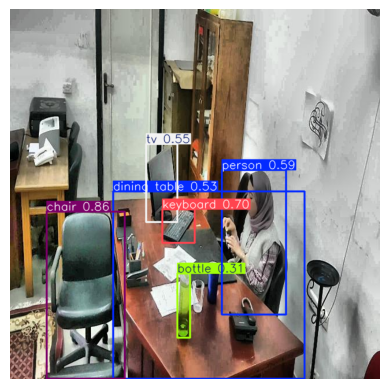

In [5]:
import cv2
import matplotlib.pyplot as plt

# Example image to test
test_image_path = '/content/drive/MyDrive/Folder/extracted/combine/test/images/*.jpg'

# Load and predict
results = model(test_image_path)

# Display the results
result_image = results[0].plot()  # Plot the results on the image
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [10]:
from ultralytics import YOLO

# Load the YOLOv8n model (nano version) - replace with your trained model path
model = YOLO('/content/yolov8n.pt')  # Update this with your model path

# Specify the image path
image_path = r'/content/drive/MyDrive/Folder/extracted/combine/test/images'

# Run prediction on the image
results = model.predict(source=image_path, save=True, conf=0.5)

# Print the prediction results
for result in results:
    print("Bounding Boxes:", result.boxes.xyxy)  # Coordinates [x1, y1, x2, y2]
    print("Confidences:", result.boxes.conf)     # Confidence scores
    print("Classes:", result.boxes.cls)          # Class indices


Streaming output truncated to the last 5000 lines.
        [315.2055, 246.8057, 450.8583, 489.2234],
        [236.0701, 241.1581, 309.2285, 366.1584]], device='cuda:0')
Confidences: tensor([0.8168, 0.8095, 0.6998], device='cuda:0')
Classes: tensor([56.,  0., 62.], device='cuda:0')
Bounding Boxes: tensor([[9.2242e+01, 3.7773e+02, 2.1948e+02, 6.3443e+02],
        [5.3596e-02, 3.6120e+02, 9.3800e+01, 6.3935e+02],
        [3.0992e+02, 2.4665e+02, 4.5132e+02, 4.8958e+02],
        [2.3619e+02, 2.3982e+02, 3.0872e+02, 3.6262e+02]], device='cuda:0')
Confidences: tensor([0.8458, 0.8264, 0.8226, 0.7112], device='cuda:0')
Classes: tensor([56.,  0.,  0., 62.], device='cuda:0')
Bounding Boxes: tensor([[ 88.6726, 213.5678, 225.8276, 636.6358],
        [236.0134, 240.0358, 308.0677, 362.6666],
        [287.2420, 331.5192, 340.1545, 393.6265],
        [349.7645, 259.1052, 438.8446, 483.3152]], device='cuda:0')
Confidences: tensor([0.8571, 0.7987, 0.7490, 0.5343], device='cuda:0')
Classes: tensor([ 0.,